# OHES

In [1]:
# Visualization of the dataframe
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = "data/processed/Canada Vigilance Adverse Reaction Online Database/"
pair_ohe = pl.read_parquet(path + "pair_ohe_full.parquet")

In [2]:
from scripts import style
style.mpl_apply()

# Histograms

In [3]:
# plot the most common SOCs (System Organ Classes), TOP 50
soc_cols = [c for c in pair_ohe.columns if c.startswith("SOC__")]
soc_sums = pair_ohe.select([pl.col(c).sum().alias(c) for c in soc_cols]).to_dicts()[0]
soc_sums_sorted = dict(sorted(soc_sums.items(), key=lambda item: item[1], reverse=True)[:27])

In [4]:
soc_sums_sorted

# RENAME THE KEYS TO REMOVE THE PREFIX SOC__
soc_sums_sorted_renamed = {k.replace("SOC__", ""): v for k, v in soc_sums_sorted.items()}
# Replace the _ with space
soc_sums_sorted_renamed = {k.replace("_", " "): v for k, v in soc_sums_sorted_renamed.items()}

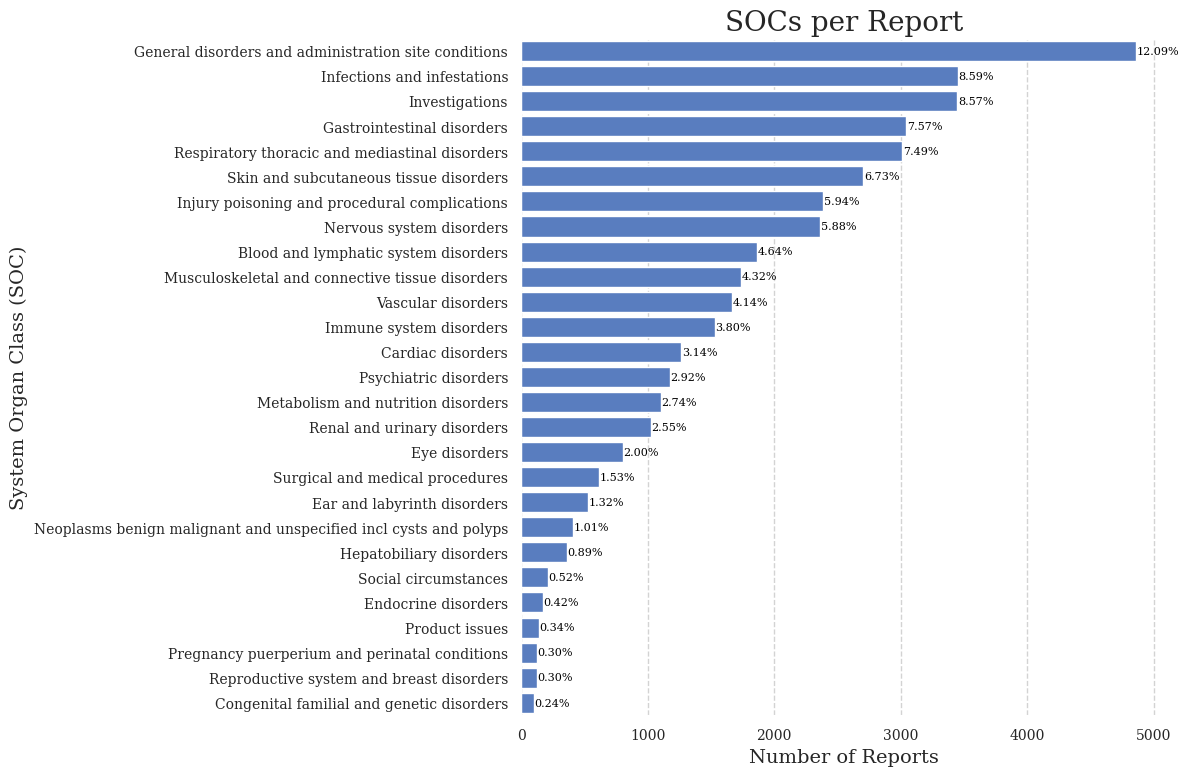

In [5]:

plt.figure(figsize=(12, 8))
sns.barplot(x=list(soc_sums_sorted_renamed.values()), y=list(soc_sums_sorted_renamed.keys()))
plt.title("SOCs per Report") #  in Cephalosporin-related Adverse Drug Reactions
plt.xlabel("Number of Reports")
plt.ylabel("System Organ Class (SOC)")
# add percentages

total_reports = sum(soc_sums_sorted_renamed.values())
for i, v in enumerate(soc_sums_sorted_renamed.values()):
    percentage = (v / total_reports) * 100
    plt.text(v + 5, i, f"{percentage:.2f}%", color='black', va='center', size=8)
plt.savefig('visualizations/canada/soc_distribution_cephalosporins.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()

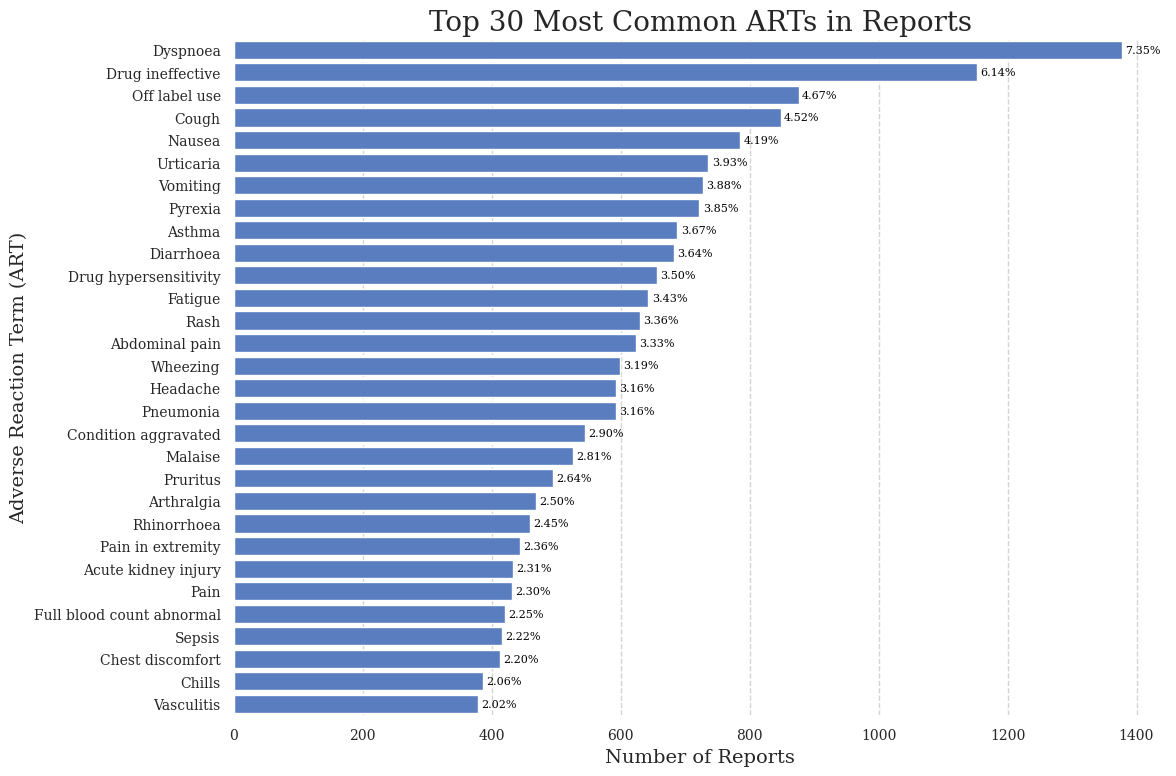

In [6]:
# plot the most common SOCs (System Organ Classes), TOP 50
soc_cols = [c for c in pair_ohe.columns if c.startswith("PT__")]
soc_sums = pair_ohe.select([pl.col(c).sum().alias(c) for c in soc_cols]).to_dicts()[0]
soc_sums_sorted = dict(sorted(soc_sums.items(), key=lambda item: item[1], reverse=True)[:30])

# RENAME THE KEYS TO REMOVE THE PREFIX PT__
soc_sums_sorted = {k.replace("PT__", ""): v for k, v in soc_sums_sorted.items()}
# Replace the _ with space
soc_sums_sorted = {k.replace("_", " "): v for k, v in soc_sums_sorted.items()}

plt.figure(figsize=(12, 8))
sns.barplot(x=list(soc_sums_sorted.values()), y=list(soc_sums_sorted.keys()))
# PT is Adverse Reaction Term
plt.title("Top 30 Most Common ARTs in Reports")
plt.xlabel("Number of Reports")
plt.ylabel("Adverse Reaction Term (ART)")
# add percentages
total_reports = sum(soc_sums_sorted.values())
for i, v in enumerate(soc_sums_sorted.values()):
    percentage = (v / total_reports) * 100
    plt.text(v + 5, i, f"{percentage:.2f}%", color='black', va='center', size=8)
plt.savefig('visualizations/canada/pt_distribution_cephalosporins.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()

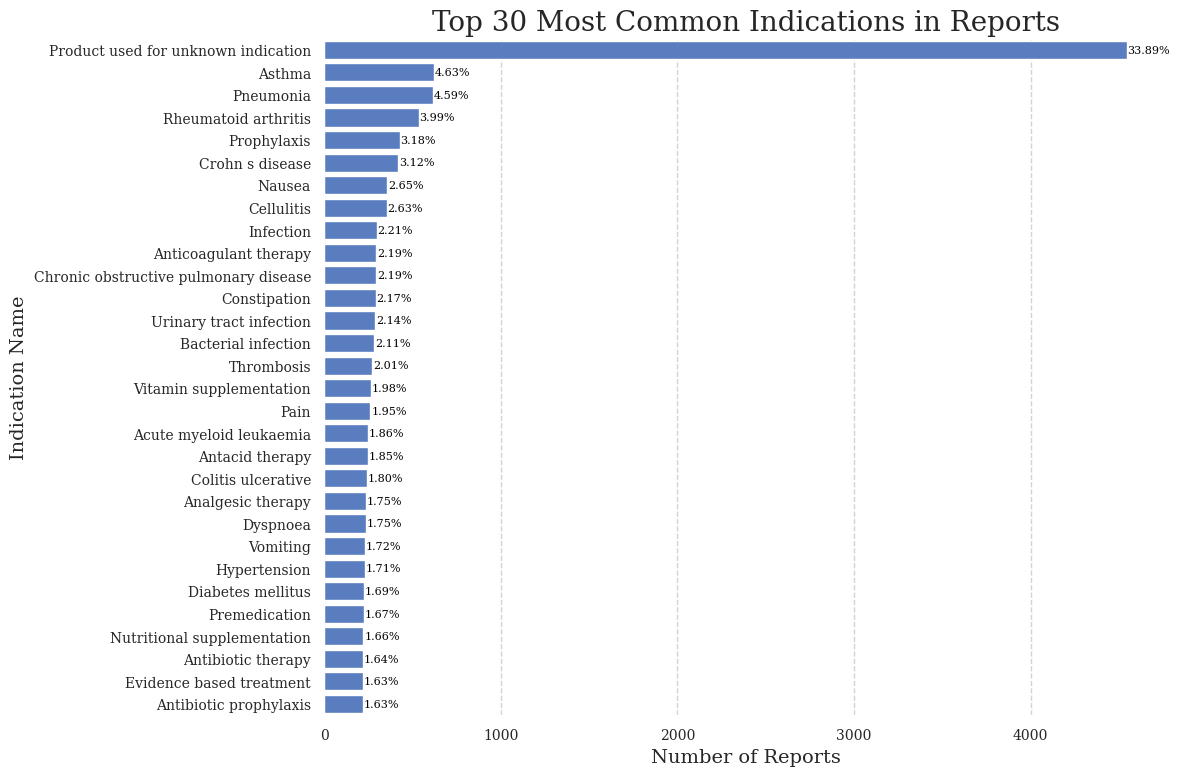

In [7]:
# plot the most common SOCs (System Organ Classes), TOP 50
soc_cols = [c for c in pair_ohe.columns if c.startswith("IND__")]
soc_sums = pair_ohe.select([pl.col(c).sum().alias(c) for c in soc_cols]).to_dicts()[0]
soc_sums_sorted = dict(sorted(soc_sums.items(), key=lambda item: item[1], reverse=True)[:30])

# RENAME THE KEYS TO REMOVE THE PREFIX IND__
soc_sums_sorted = {k.replace("IND__", ""): v for k, v in soc_sums_sorted.items()}
# Replace the _ with space
soc_sums_sorted = {k.replace("_", " "): v for k, v in  soc_sums_sorted.items()}


# INDICATION_NAME_ENG
plt.figure(figsize=(12, 8))
sns.barplot(x=list(soc_sums_sorted.values()), y=list(soc_sums_sorted.keys()))
plt.title("Top 30 Most Common Indications in Reports")
plt.xlabel("Number of Reports")
plt.ylabel("Indication Name")
# add percentages
total_reports = sum(soc_sums_sorted.values())
for i, v in enumerate(soc_sums_sorted.values()):
    percentage = (v / total_reports) * 100
    plt.text(v + 5, i, f"{percentage:.2f}%", color='black', va='center', size=8)
plt.tight_layout()
plt.savefig('visualizations/canada/indication_distribution_cephalosporins.pdf', bbox_inches='tight')
plt.show()

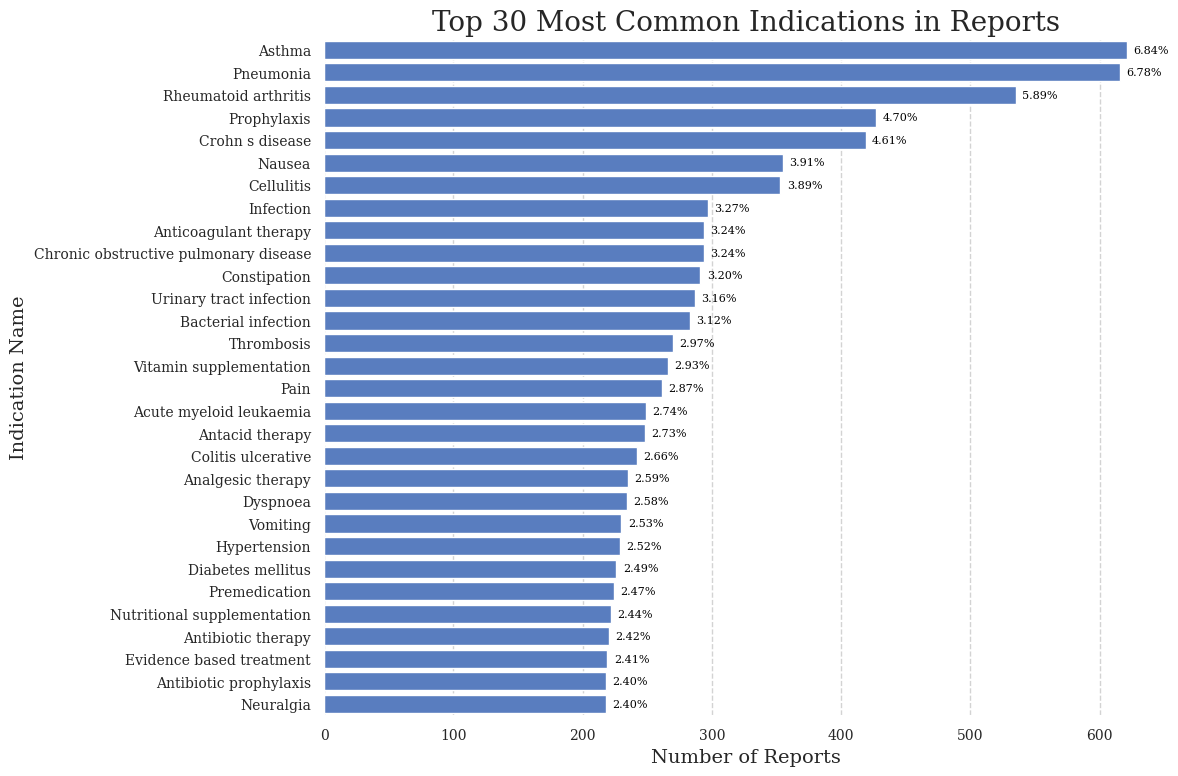

In [8]:
# plot the most common SOCs (System Organ Classes), TOP 50
soc_cols = [c for c in pair_ohe.columns if c.startswith("IND__")]
soc_sums = pair_ohe.select([pl.col(c).sum().alias(c) for c in soc_cols]).to_dicts()[0]
soc_sums_sorted = dict(sorted(soc_sums.items(), key=lambda item: item[1], reverse=True)[1:31])

# RENAME THE KEYS TO REMOVE THE PREFIX IND__
soc_sums_sorted = {k.replace("IND__", ""): v for k, v in soc_sums_sorted.items()}
# Replace the _ with space
soc_sums_sorted = {k.replace("_", " "): v for k, v in  soc_sums_sorted.items()}


# INDICATION_NAME_ENG
plt.figure(figsize=(12, 8))
sns.barplot(x=list(soc_sums_sorted.values()), y=list(soc_sums_sorted.keys()))
plt.title("Top 30 Most Common Indications in Reports")
plt.xlabel("Number of Reports")
plt.ylabel("Indication Name")
# add percentages
total_reports = sum(soc_sums_sorted.values())
for i, v in enumerate(soc_sums_sorted.values()):
    percentage = (v / total_reports) * 100
    plt.text(v + 5, i, f"{percentage:.2f}%", color='black', va='center', size=8)
plt.tight_layout()
plt.savefig('visualizations/canada/indication_distribution_cephalosporins2.pdf', bbox_inches='tight')
plt.show()

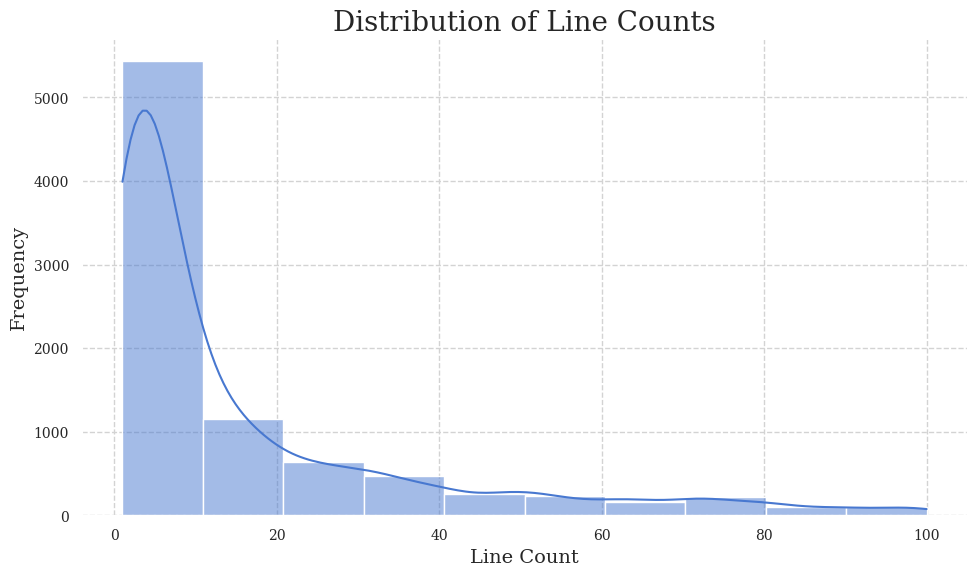

In [10]:
# plot the distribution of line counts
plt.figure(figsize=(10, 6))
# keep from 0 to 10 the line counts before plotting
pair_ohe2 = pair_ohe.filter(pl.col("line_count").is_between(0, 100))
sns.histplot(data=pair_ohe2, x="line_count", bins=10, kde=True)
plt.title("Distribution of Line Counts")
plt.xlabel("Line Count")
plt.ylabel("Frequency")
plt.tight_layout()

plt.savefig('visualizations/canada/line_count_distribution.pdf')
plt.show()

# Correlations

## SOCS vs SOCS

In [44]:
# Get the one ones that has PT__ 
pts = [c for c in pair_ohe.columns if c.startswith("SOC__")]

# make it a dataframe with only REPORT_ID, ACTIVE_INGREDIENT_NAME, line_count and the pts columns
pt_df = pair_ohe.select(["REPORT_ID", "ACTIVE_INGREDIENT_NAME"] + pts)

# remove PT__ at the beginning of the column names
pt_df = pt_df.rename({c: c.replace("SOC__", "") for c in pts})

# drop ACTIVE_INGREDIENT_NAME
pt_df = pt_df.drop("ACTIVE_INGREDIENT_NAME")

event_cols = pt_df.columns[1:]  # Exclude REPORT_ID



# Update the column names in pt_df to reflect the replaced spaces
pt_df = pt_df.rename({c: c.replace("_", " ") for c in event_cols})

event_cols = pt_df.columns[1:]  # Exclude REPORT_ID

pt_df

REPORT_ID,Investigations,Skin and subcutaneous tissue disorders,Injury poisoning and procedural complications,Infections and infestations,Metabolism and nutrition disorders,General disorders and administration site conditions,Vascular disorders,Blood and lymphatic system disorders,Immune system disorders,Gastrointestinal disorders,Psychiatric disorders,Musculoskeletal and connective tissue disorders,Respiratory thoracic and mediastinal disorders,Nervous system disorders,Renal and urinary disorders,Congenital familial and genetic disorders,Hepatobiliary disorders,Cardiac disorders,Ear and labyrinth disorders,Product issues,Pregnancy puerperium and perinatal conditions,Neoplasms benign malignant and unspecified incl cysts and polyps,Social circumstances,Eye disorders,Reproductive system and breast disorders,Endocrine disorders,Surgical and medical procedures,UNK
i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
1068447,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
903384972,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1049952,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
905792672,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1086457,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
902205230,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
901920829,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
506631,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


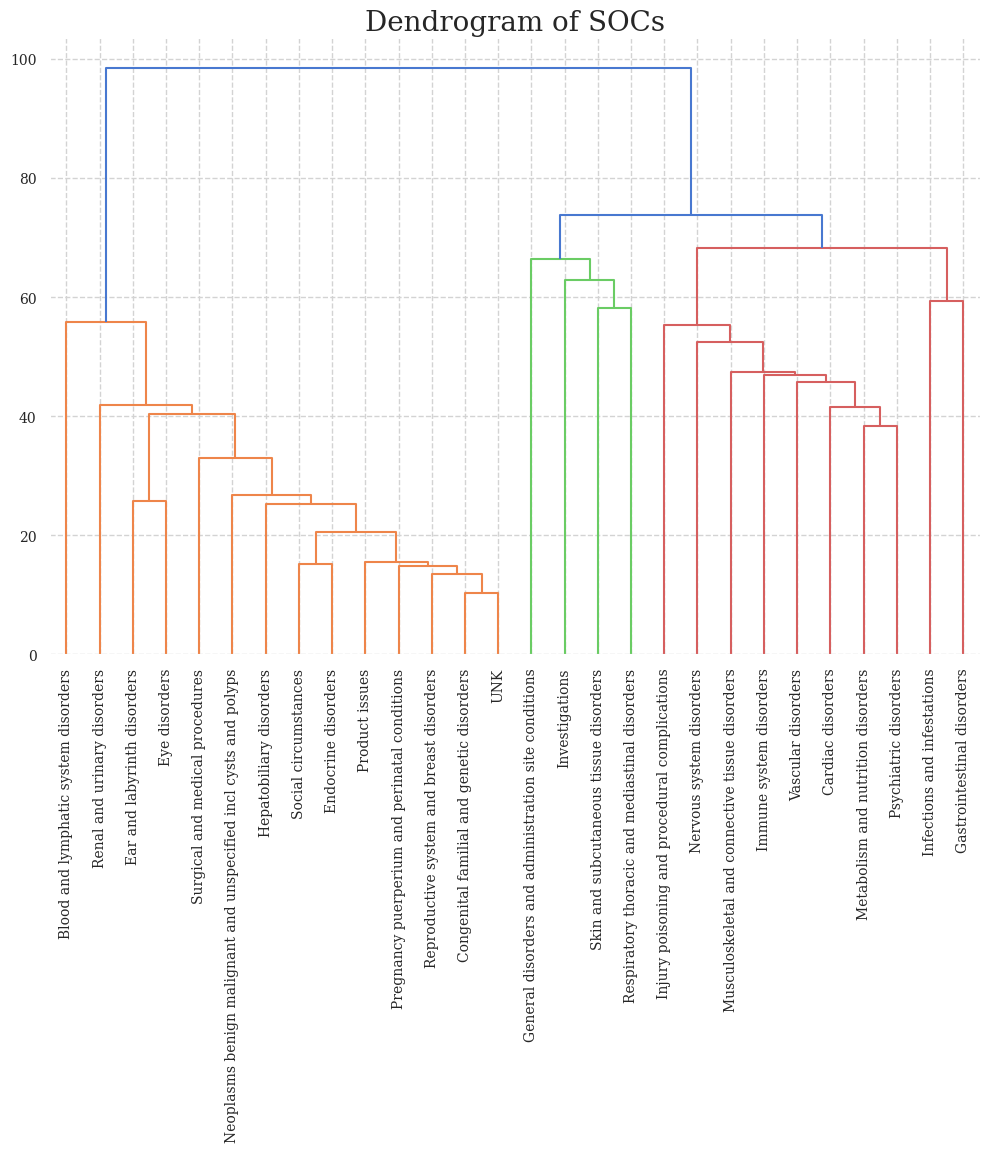

In [46]:
# plot dendogram of pt_df
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(pt_df.select(event_cols).to_pandas().T, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linked, labels=event_cols, leaf_rotation=90)
plt.title("Dendrogram of SOCs")
plt.savefig('visualizations/canada/soc_dendrogram.pdf', bbox_inches='tight')
plt.show()

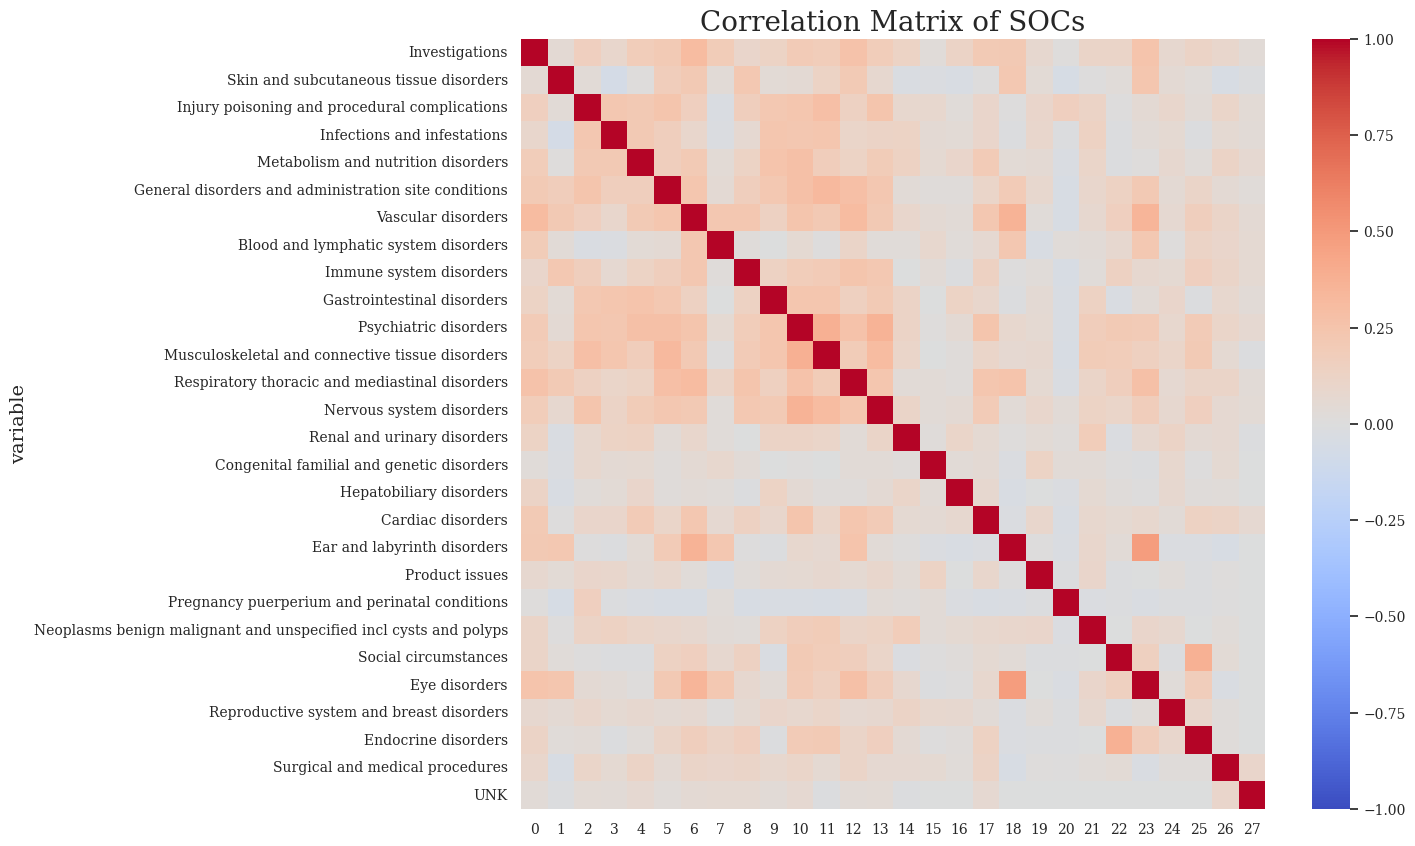

In [49]:
# Clustermap
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
corr = {
    c1: [
        pt_df.select(pl.corr(c1, c2)).item()
        for c2 in event_cols
    ]
    for c1 in event_cols
}
corr_df = pl.DataFrame({
    "variable": list(corr.keys()),
    **{f"{i}": [corr[var][i] for var in corr.keys()] for i in range(len(event_cols))}
})
plt.figure(figsize=(12, 10))
corr_matrix = corr_df.to_pandas().set_index('variable') 
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of SOCs")
plt.show()

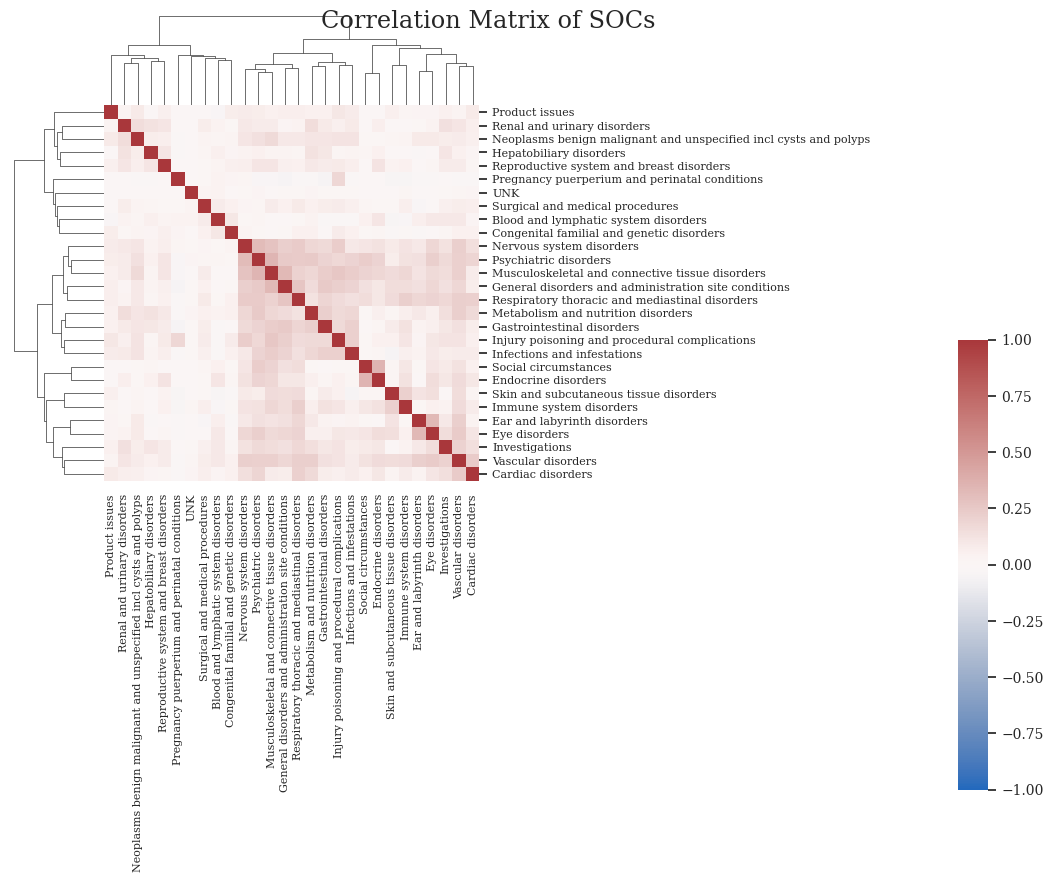

In [62]:
import polars as pl

event_cols = pt_df.columns[1:]

per_report = (
    pt_df
    .group_by("REPORT_ID")
    .agg([pl.max(c).alias(c) for c in event_cols])  # any SOC present in that report
)

import pandas as pd

per_report_pd = per_report.to_pandas()

# index by REPORT_ID, matrix = only event columns
X = per_report_pd.set_index("REPORT_ID")[event_cols]

# correlation between SOCs (phi on 0/1)
corr = X.corr(method="pearson")  # event_cols × even t_cols


# delete the colorbar
g = sns.clustermap(
    corr,
    metric="euclidean",  # distance on the correlation matrix
    method="ward",
    vmin=-1,
    vmax=1,
    cmap="vlag",
)

# g.cax.remove()
# mave the colorbar to the right
g.cax.set_position([.97, .2, .03, .45])

# make the xtick labels smaller
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=8)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), fontsize=8)
g.fig.suptitle("Correlation Matrix of SOCs")
plt.savefig('visualizations/canada/soc_correlation_clusters.pdf', bbox_inches='tight')
plt.show()


# SOCS vs SOCs Correlation Matrix

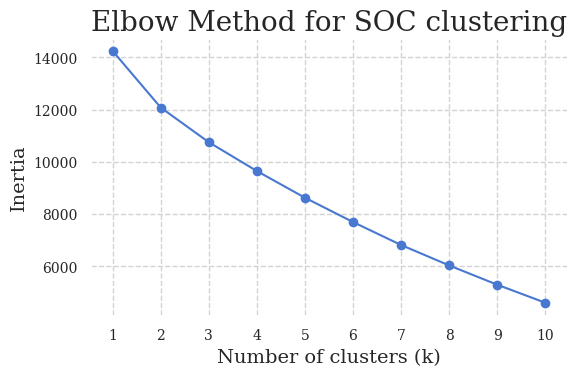

k=2: silhouette (SOCs)=0.299
k=3: silhouette (SOCs)=0.146
k=4: silhouette (SOCs)=0.152
k=5: silhouette (SOCs)=0.154
k=6: silhouette (SOCs)=0.154
k=7: silhouette (SOCs)=0.158
k=8: silhouette (SOCs)=0.153
k=9: silhouette (SOCs)=0.138
k=10: silhouette (SOCs)=0.146
Best k by silhouette: 2


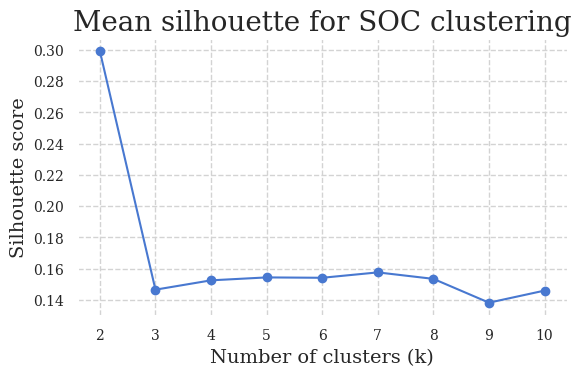

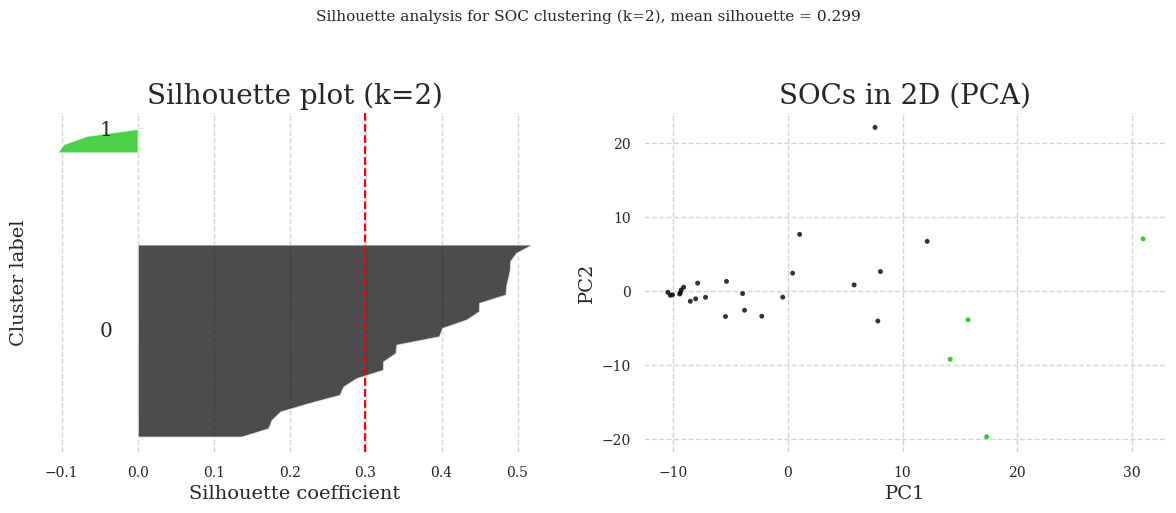

In [59]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ---------- 1. DATA (you already have this) ----------
# X: reports × SOCs
# we are clustering SOCs, so:
X_soc = X.T.values  # shape: n_SOCs × n_reports

# Elbow method (optional)
inertia_soc = []
for k in range(1, 11):
    model = AgglomerativeClustering(
        n_clusters=k,
        linkage="ward"
    )
    labels = model.fit_predict(X_soc)
    # compute inertia as sum of squared distances to cluster centers
    inertia = 0
    for i in range(k):
        cluster_points = X_soc[labels == i]
        if cluster_points.shape[0] > 0:
            center = cluster_points.mean(axis=0)
            inertia += np.sum((cluster_points - center) ** 2)
    inertia_soc.append(inertia)
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia_soc, marker='o')
plt.title("Elbow Method for SOC clustering")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.savefig("visualizations/canada/elbow_soc.pdf", bbox_inches="tight")
plt.show()


# ---------- 2. SCAN k WITH SILHOUETTE ----------
ks = range(2, 11)
sil_scores_soc = []

for k in ks:
    model = AgglomerativeClustering(
        n_clusters=k,
        linkage="ward"
    )
    labels = model.fit_predict(X_soc)
    score = silhouette_score(X_soc, labels, metric="euclidean")
    sil_scores_soc.append(score)

for k, s in zip(ks, sil_scores_soc):
    print(f"k={k}: silhouette (SOCs)={s:.3f}")

best_k = ks[int(np.argmax(sil_scores_soc))]
print("Best k by silhouette:", best_k)

# optional: quick line plot of mean silhouette vs k
plt.figure(figsize=(6, 4))
plt.plot(ks, sil_scores_soc, marker='o')
plt.title("Mean silhouette for SOC clustering")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.xticks(ks)
plt.grid(True)
plt.tight_layout()
plt.savefig("visualizations/canada/silhouette_mean_socs.pdf", bbox_inches="tight")
plt.show()

# ---------- 3. DETAILED SILHOUETTE + PCA SCATTER (1×2) ----------
k = best_k  # or set manually

model = AgglomerativeClustering(
    n_clusters=k,
    linkage="ward"
)
cluster_labels = model.fit_predict(X_soc)

# per-sample silhouette values
sample_silhouette_values = silhouette_samples(
    X_soc,
    cluster_labels,
    metric="euclidean"
)
silhouette_avg = sample_silhouette_values.mean()

# 2D representation of SOCs for visualization
pca = PCA(n_components=2)
X_soc_2d = pca.fit_transform(X_soc)  # shape: n_SOCs × 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ----- left: silhouette plot per SOC -----
y_lower = 10
for i in range(k):
    ith_vals = sample_silhouette_values[cluster_labels == i]
    ith_vals.sort()
    size_i = ith_vals.shape[0]
    y_upper = y_lower + size_i

    color = plt.cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_vals,
        facecolor=color,
        alpha=0.7,
    )

    # label cluster number on the y-axis
    ax1.text(-0.05, y_lower + 0.5 * size_i, str(i))
    y_lower = y_upper + 10  # space between clusters

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_title(f"Silhouette plot (k={k})")
ax1.set_xlabel("Silhouette coefficient")
ax1.set_ylabel("Cluster label")
ax1.set_yticks([])

# ----- right: PCA scatter of SOCs colored by cluster -----
colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / k)
ax2.scatter(
    X_soc_2d[:, 0],
    X_soc_2d[:, 1],
    marker=".",
    s=50,
    lw=0,
    alpha=0.8,
    c=colors,
)
ax2.set_title("SOCs in 2D (PCA)")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")

plt.suptitle(
    f"Silhouette analysis for SOC clustering (k={k}), "
    f"mean silhouette = {silhouette_avg:.3f}",
    y=1.03,
    fontsize=11,
)

plt.tight_layout()
# optional save
plt.savefig("visualizations/canada/silhouette_detail_socs.pdf", bbox_inches="tight")
plt.show()


Cluster sizes (SOC-level):
2    24
1     4
Name: count, dtype: int64


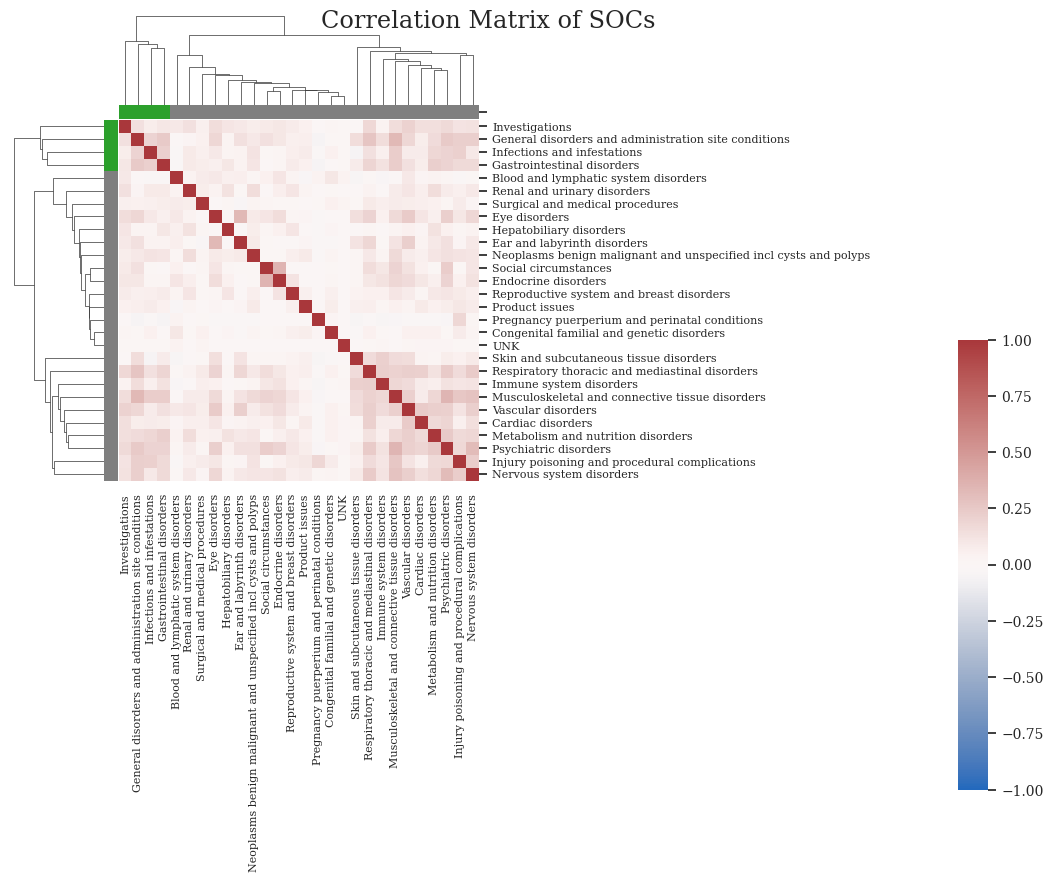

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster

# 1) Same data as silhouette
X_soc = X.T.values           # SOC × reports
soc_names = X.columns.to_list()

# 2) Hierarchical clustering (Ward, Euclidean) on X_soc
Z = linkage(X_soc, method="ward", metric="euclidean")

# 3) Cut into 2 clusters, should match silhouette k=2
labels = fcluster(Z, t=2, criterion="maxclust")
cluster_sizes = pd.Series(labels, index=soc_names).value_counts()
print("Cluster sizes (SOC-level):")
print(cluster_sizes)         # e.g. 4 vs 23

# 4) Build a color strip to see which SOC is in which cluster
palette = {1: "tab:green", 2: "tab:gray"}
row_colors = pd.Series(labels, index=soc_names).map(palette)

# 5) Compute correlation matrix just for the heatmap values
corr = X.corr(method="pearson")

# 6) Clustermap using the SAME linkage as silhouette
g = sns.clustermap(
    corr,
    row_linkage=Z,          # <-- force same tree
    col_linkage=Z,          # symmetric
    row_colors=row_colors,  # color bars by cluster
    col_colors=row_colors,
    cmap="vlag",
    vmin=-1,
    vmax=1
)

g.cax.set_position([.97, .2, .03, .45])
g.fig.suptitle("Correlation Matrix of SOCs")
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=8)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), fontsize=8)
plt.savefig('visualizations/canada/soc_correlation_clusters.pdf', bbox_inches='tight')
plt.show()
